In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from stop_words import get_stop_words
from unidecode import unidecode

#Librerías necesarias para la limpieza de datos
import string
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yerko.gallardo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yerko.gallardo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
df = pd.read_pickle('df_procesado.pkl')

In [6]:
def_dic = {
    'declaracion_uso_datos': 'Declaro que los datos suministrados son verdaderos y autorizo a la Universidad Mayor a tratar los mismos en los términos de la ley Nº 19.628, con la finalidad de obtener el perfil socioeducativo y...',
    't_desde_egreso': 'Desde que egresaste de la Enseñanza Media, ¿Cuánto tiempo trascurrió para que ingresaras a la Educación Superior?',
    'razon_ingreso_tardio_ed_mayor':"¿Puedes indicarnos a qué factor atribuyes principalmente que tu ingreso a la Educación Superior no fuera antes?",
    'estudia_antes_edsup':'¿Estudiaste en alguna Institución de Educación Superior antes de ingresar a la Universidad Mayor?',
    'finalizo_est_antes_edsup':'Si tu respuesta anterior fue afirmativa, indícanos si finalizaste tus estudios',
    'estado_civil':'¿Cuál es tu estado civil?',
    'tiene_hijos':"¿Tienes hijos/as?",
    'red_apoyo':'Indícanos si cuentas con una red de apoyo para sus cuidados.',
    'quien_red_apoyo':'En caso de contar con una red de apoyo, indícanos cual identificarías como principal.',
    'etnia':"¿A qué etnia o cultura originaria perteneces?",
    'genero_se_identifica':'¿Con cuál género te identificas?',
    'orientacion_sexual':"¿Cuál es tu orientación sexual?",
    'sistema_salud':'¿A qué sistema de salud estás afiliado?',
    'sis_salud_afiliado':'¿A qué sistema de salud estás afiliado?',
    'declara_discapacidad': '¿Deseas declarar algún tipo de discapacidad o condición específica que requiera apoyos, para facilitar tu participación académica?',
    'situacion_discapacidad': 'Declara algún tipo de discapacidad o condición específica que requiera apoyos para facilitar su participación académica.',
    'acreditacion_discapacidad':"En caso de que hayas referido alguna discapacidad, indícanos de qué forma está acreditada.",
    'condicion_dificultad_clases': '¿Deseas declarar alguna enfermedad o condición específica que pueda afectar tu asistencia a clases, el desarrollo de clases online o a distancia, o bien, tu rendimiento académico?',
    'comentario_dificultad':'Declara enfermedad o condición especifica que puede afectar a la asistencia a clases, desarrollo online o a distancio o el rendimiento académico',
    'cuidados_dentro_campus':"Para contextos de clases presenciales. ¿Deseas declarar alguna condición o enfermedad que requiera cuidados dentro del Campus o sala de clases?",
    'comentar_situacion_cuidados_campus':'Declara alguna condición o enfermedad que requiere cuidados dentro del Campus o en la sala de clases.',
    'contacto_emergencia': 'En caso de que se presente una emergencia o accidente que afecte tu salud física y/o mental, ¿Deseas registrar el contacto de alguna persona de referencia para que informemos? De ser así, Indica n...',
    'estudios_familiar': '¿Alguno de los siguientes integrantes de tu familia se tituló de alguna carrera de la Educación Superior ya sea en alguna Universidad, Instituto Profesional o Centro de Formación Técnica?',
    'tramo_registro_social': 'Según el Registro Social de Hogares, ¿Cuál es tu tramo de calificación socioeconómica?',
    'cuantos_convive_2023': 'Incluyéndote ¿Con cuántas personas convivirás durante el año académico 2023?',
    'situacion_laboral_jefe_hogar': '¿Cuál es la situación laboral del/la jefe(a) de tu hogar?',
    'situacion_laboral': "¿Actualmente trabajas?",
    'horas_semanales_laboral': "En caso de que la respuesta anterior sea afirmativa, ¿Cuántas horas semanales dedicas a esta actividad?",
    'dependencia_grupo_familiar': 'Hay algún integrante de tu grupo familiar que dependa de otro para realizar sus actividades cotidianas por condiciones de salud?',
    'dependientes_de_estudiante': '¿Existen personas que dependan de ti?',
    'quien_depende_estudiante': "Indícanos sobre quien depende de ti, a qué tipo de persona(s) corresponde.",
    'horas_cuidado_estudiante': "Respecto al cuidado que otorgas a otro(s), indícanos cuántas horas semanales dedicas a esta actividad.",
    'lugar_estudio_alumno': '¿En qué lugar desarrollarás principalmente tus actividades de estudio?',
    'acceso_medio_digital': 'En lo referente al uso de tecnologías ¿Posees acceso a algún medio digital?',
    'uso_exclusivo_medio_digital': 'Indícanos si el medio tecnológico que posees es de tu uso exclusivo.',
    'acceso_internet_alumno': 'Respecto a la conectividad, ¿Cuentas con acceso a internet en tu hogar o residencia?',
    'factores_dificultad_estudio': 'Al iniciar tu período académico universitario, ¿Crees que alguno de estos factores podría dificultar tu aprendizaje en asignaturas que se dicten de manera online o a distancia?',
    'dificultad_trayecto': '¿Durante tu trayectoria académica has presentado alguna barrera que ha dificultado tu proceso aprendizaje?',
    'situacion_dificultad': 'Comenta que ha presentado alguna barrera que ha dificultado el proceso de aprendizaje',
    'mayores_habilidades': 'Según tu percepción ¿En qué áreas del aprendizaje sientes mayor habilidad en este momento? Puedes seleccionar más de una alternativa',
    'area_aprendizaje_quiere_potenciar': '¿Qué área del aprendizaje quisieras potenciar en tu proceso académico? Puedes seleccionar más de una alternativa',
    'apoyo_pedadogico_requiere': '¿Crees que alguno de estos apoyos pedagógicos pudiera facilitar tu aprendizaje?',
    'requiere_pares_mentores': 'Considerando que la Universidad cuenta con el Programa “Pares Mentores”, el cual tiene como objetivo que un alumno de primer año se adapte a la vida universitaria, creando lazos con un estudiante ...',
    'tiempo_traslado': '¿Cuánto tiempo tardas en trasladarte desde tu lugar de residencia a la Universidad? ',
    'medio_transporte': '¿Qué medio de transporte utilizas para desplazarte a la Universidad?',
    'actividades_de_interes': 'Señala cuál(es) de estas actividades es(son) de tu interés: Puedes seleccionar más de una opción',
    'preferencias_estudio': 'Respecto a tus preferencias, habitualmente:',
    'practica_deporte_hobbie': '¿Prácticas algún deporte o hobby?',
    'indica_deporte_hobbie': 'Deportes o hobbies declarado por los alumnos.',
    'preferencia_act_extracurricular': 'Indícanos cuál de estas actividades sería de tu interés. Puedes seleccionar más de una opción.',
    'genero_identifica_mfo': '¿Con cuál género te identificas?'
}

In [7]:
wcloud = ['quien_red_apoyo', 'situacion_discapacidad', 'comentario_dificultad', 'comentar_situacion_cuidados_campus',
          'dependientes_de_estudiante', 'quien_depende_estudiante', 'factores_dificultad_estudio', 'situacion_dificultad',
          'indica_deporte_hobbie', 'genero_se_identifica', 'razon_ingreso_tardio_ed_mayor']

In [8]:
stop_words_esp = get_stop_words('spanish')
stop_words_esp += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser", 'apoyo']

In [9]:
def text_preproc(df, column):
    df['text'] = df[column].fillna('')
    df['text'] = df['text'].str.lower()
    # Remove all punctuations, numbers, and special characters
    df['text'] = df['text'].str.replace('[^\w\s]', '', regex=False)
    # Remove stop words
    #stop_words_esp = set(stopwords.words('spanish'))
    df['text'] = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words_esp]))
    # Tokenize the text data
    df['text'] = df['text'].apply(word_tokenize)
    # Convert words with accents to words without accents
    df['text'] = df['text'].apply(lambda x: [unidecode(word) for word in x])
    # Text with all the words
    words = ' '.join(df['text'].explode().replace(np.nan, '', regex=True))
    return words

In [10]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_yticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, break_long_words=break_long_words))
    ax.set_yticklabels(labels)





quien_red_apoyo


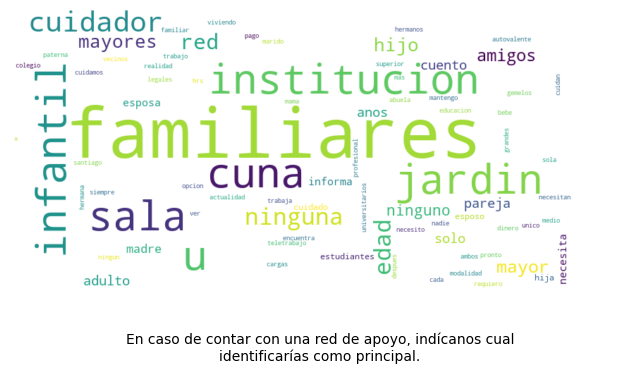





situacion_discapacidad


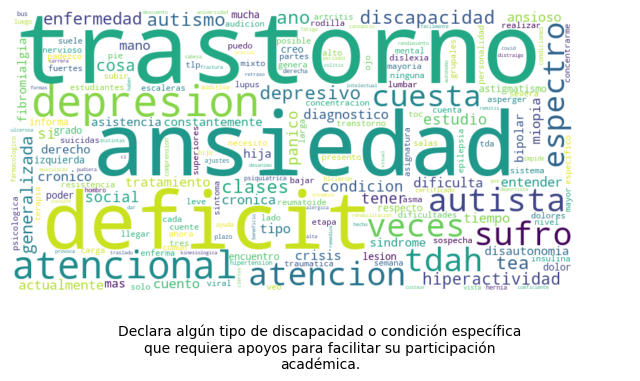





comentario_dificultad


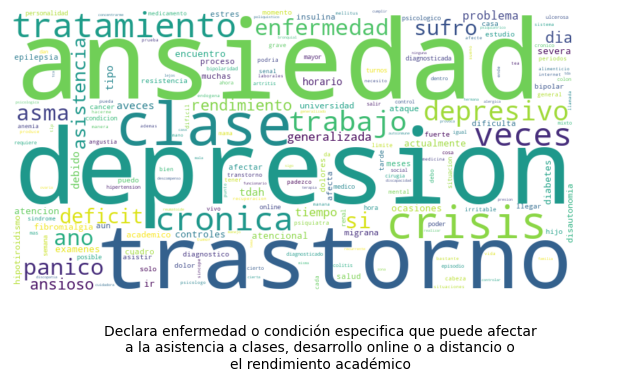





comentar_situacion_cuidados_campus


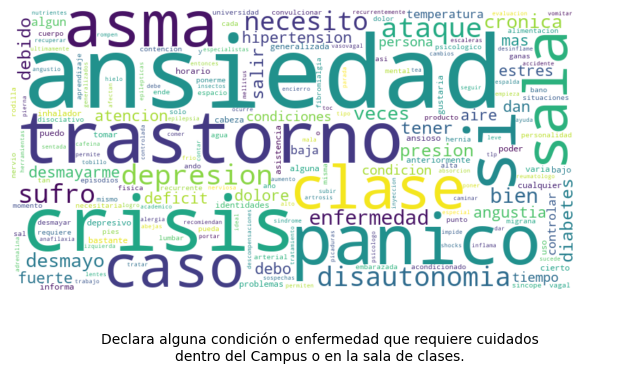





dependientes_de_estudiante


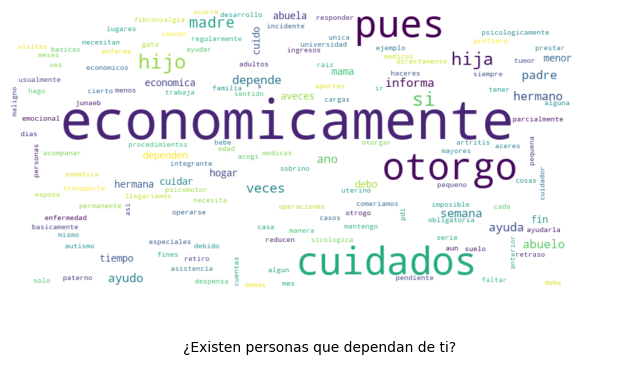





quien_depende_estudiante


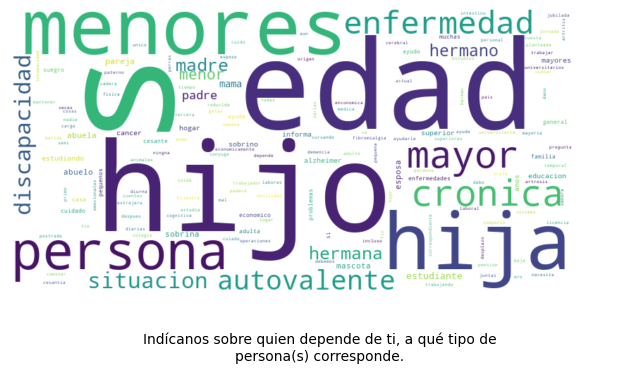





factores_dificultad_estudio


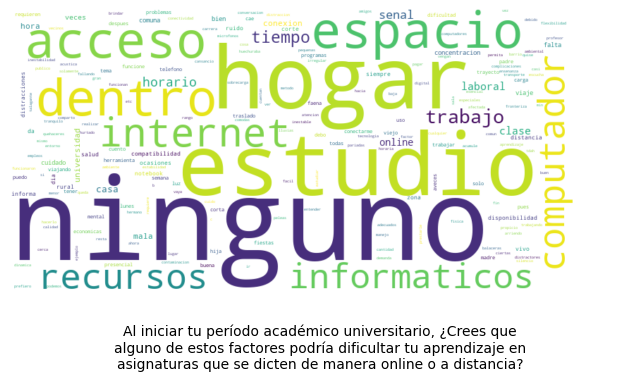





situacion_dificultad


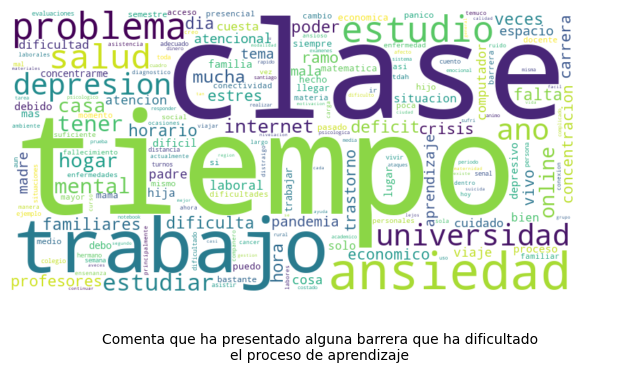





indica_deporte_hobbie


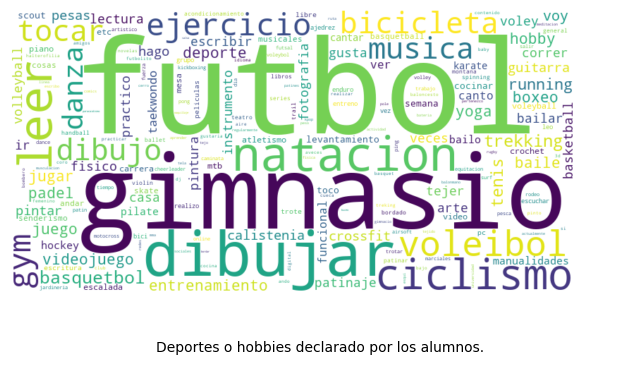





genero_se_identifica


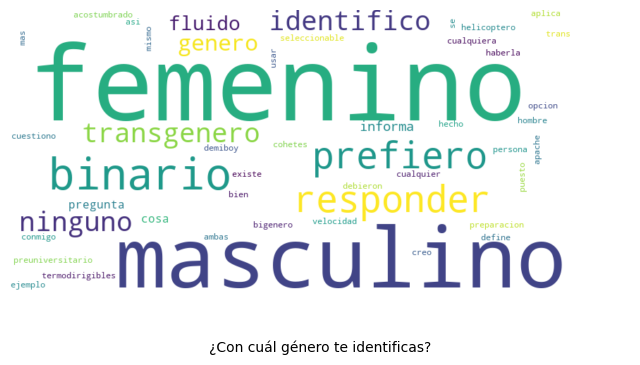





razon_ingreso_tardio_ed_mayor


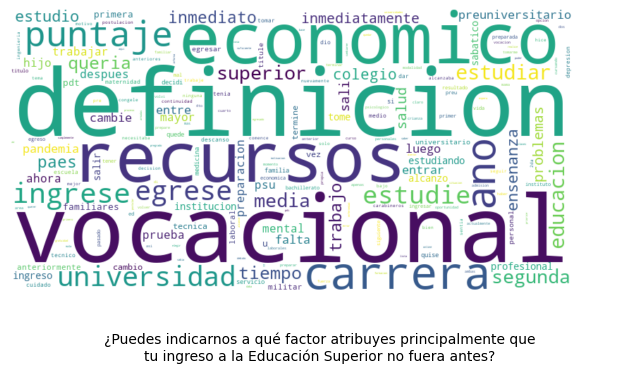

In [11]:
for cloud in wcloud:
    words = text_preproc(df, cloud)
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, collocations=False).generate(words)
    print('\n\n\n')
    print(cloud)
    plt.figure(figsize=(8,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    titulo = def_dic[cloud] if cloud in def_dic else None
    plt.xlim(right=plt.xlim()[1] * 1.1)
    descripcion_recortada = '\n'.join(textwrap.wrap(titulo, width=60))
    plt.text(0.5, -0.20, descripcion_recortada, ha='center', va='center', transform=plt.gca().transAxes)
    plt.show()


In [12]:
# Asignar los valores de la nueva columna genero_identifica_mfo
df['genero_identifica_mfo'] = np.where(df['genero_se_identifica'].isin(['Femenino', 'Masculino']), df['genero_se_identifica'], 'Otro')

In [13]:
graficar = ['declaracion_uso_datos', 't_desde_egreso', 'estudia_antes_edsup', 'finalizo_est_antes_edsup', 'estado_civil',
            'tiene_hijos', 'red_apoyo', 'etnia', 'declara_discapacidad', 'cuidados_dentro_campus', 'tramo_registro_social',
            'cuantos_convive_2023', 'situacion_laboral', 'horas_semanales_laboral', 'dependencia_grupo_familiar', 
            'horas_cuidado_estudiante', 'acceso_medio_digital', 'uso_exclusivo_medio_digital', 'acceso_internet_alumno',
            'dificultad_trayecto', 'requiere_pares_mentores', 'tiempo_traslado', 'medio_transporte', 'practica_deporte_hobbie', 
            'orientacion_sexual','condicion_dificultad_clases', 'situacion_laboral_jefe_hogar', 'lugar_estudio_alumno', 'genero_identifica_mfo']

In [14]:
nuevo_df = pd.DataFrame(df, columns=graficar)
# Seleccionar todas las columnas con tipo de dato "object"
columnas_object = nuevo_df.select_dtypes(include=['object']).columns
# Cambiar el tipo de dato de las columnas seleccionadas a "categorical"
nuevo_df[columnas_object] = nuevo_df[columnas_object].astype('category')

In [15]:
def graficar_mod(df, column):
    # Obtener los valores y sus frecuencias, ordenados de forma descendente
    value_counts = df[column].value_counts().sort_values(ascending=False)
    # Crear un DataFrame ordenado con los valores y sus frecuencias
    data = pd.DataFrame({column: value_counts.index, 'Cantidad de estudiantes': value_counts.values})
    # Crear el gráfico de barras utilizando Seaborn
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.barplot(x='Cantidad de estudiantes', y=column, data=data, order=value_counts.index)
    wrap_labels(ax, 60)
    # Configurar el título y las etiquetas de los ejes
    titulo = def_dic[column] if column in def_dic else None
    plt.title('Gráfico de ' + column)
    plt.xlabel('Cantidad de estudiantes')
    plt.ylabel(column)
    ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
    descripcion_recortada = '\n'.join(textwrap.wrap(titulo, width=60))
    plt.text(0.5, -0.20, descripcion_recortada, ha='center', va='center', transform=ax.transAxes)
    # Agregar los valores en las barras
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        value = int(width)
        ax.annotate(f'{value}', (x + width, y + height/2), ha='left', va='center')

    plt.show()

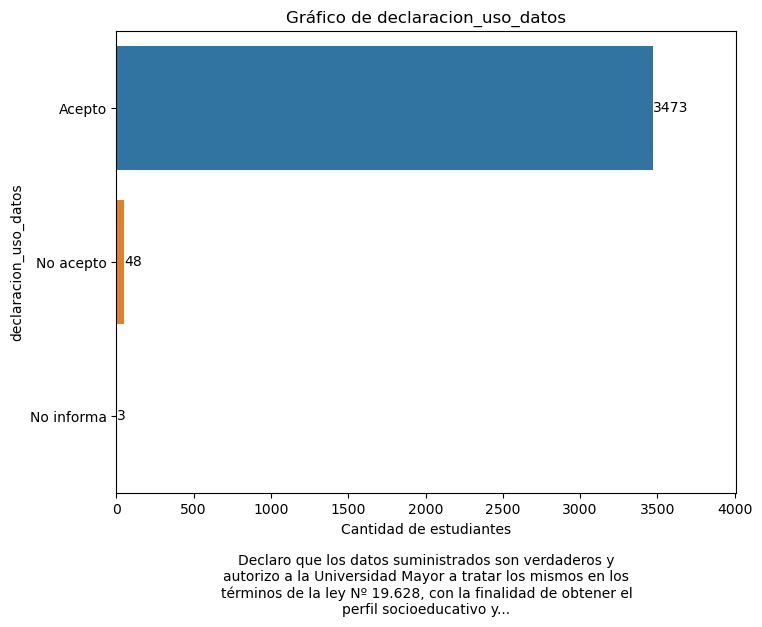

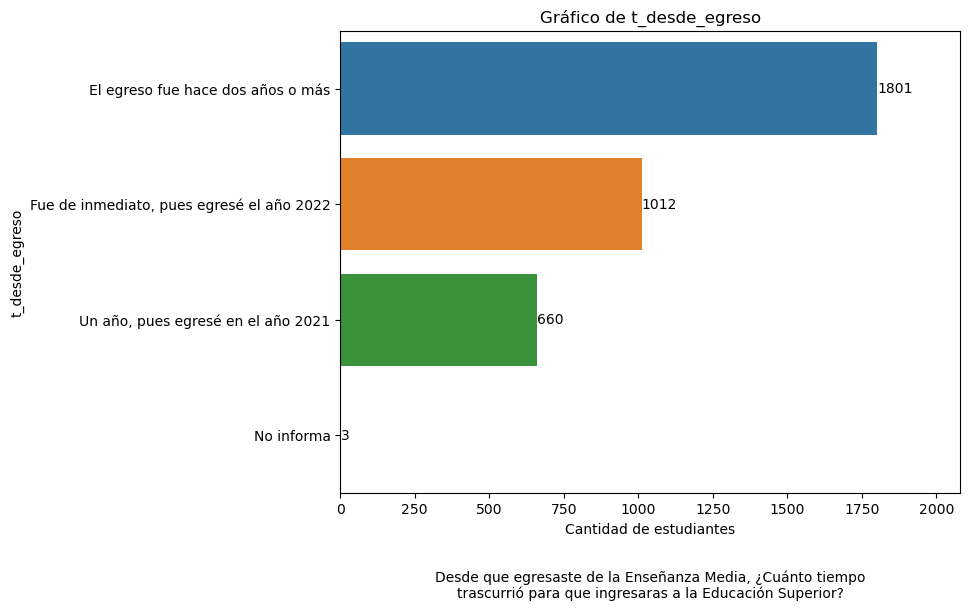

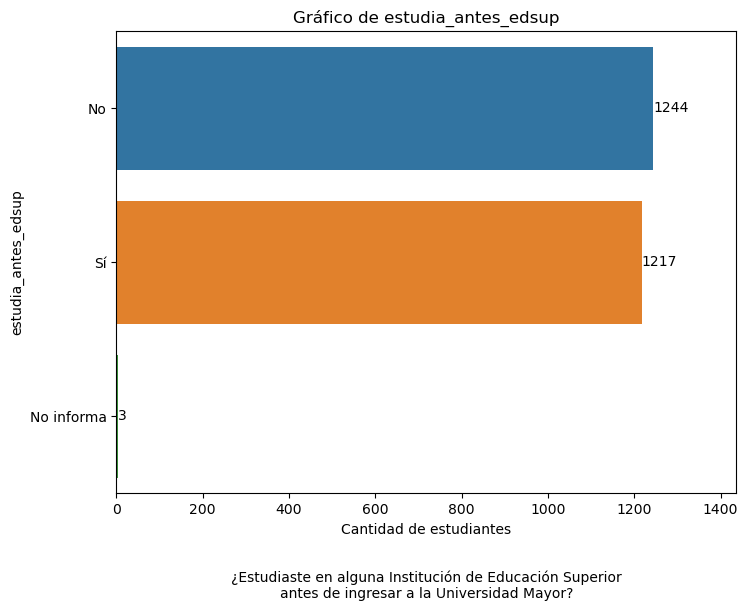

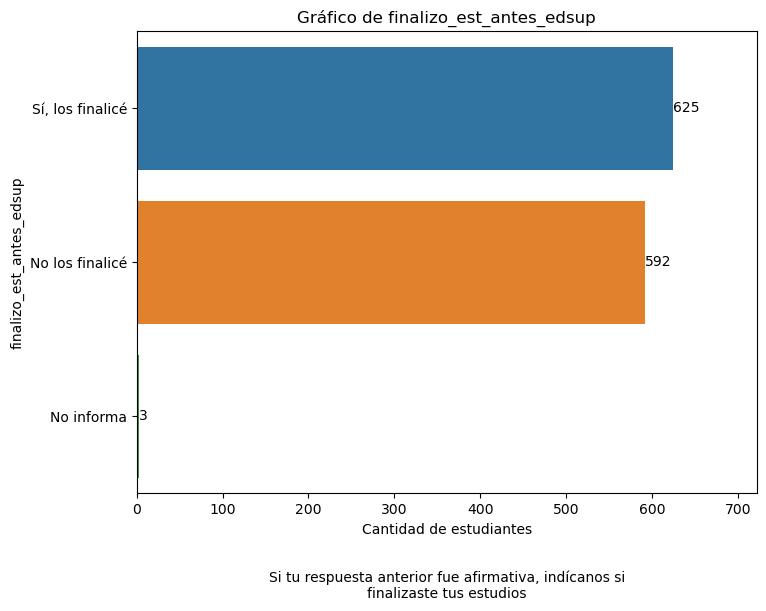

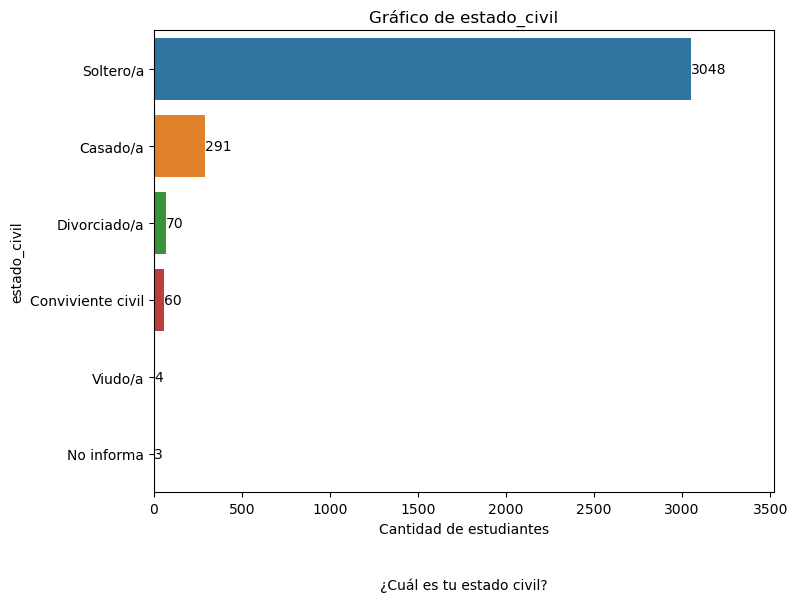

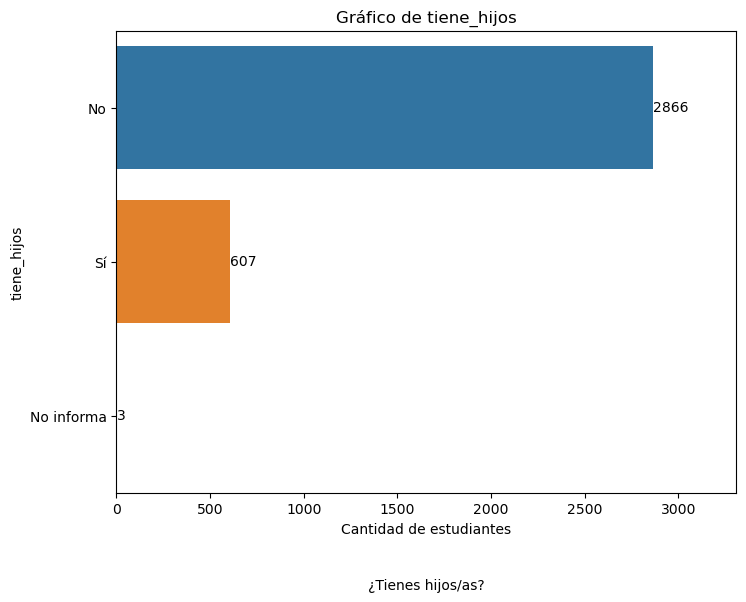

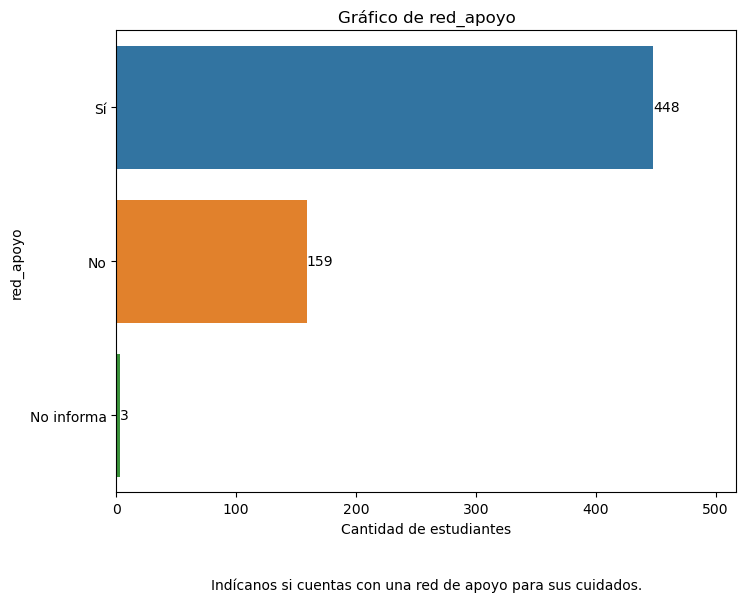

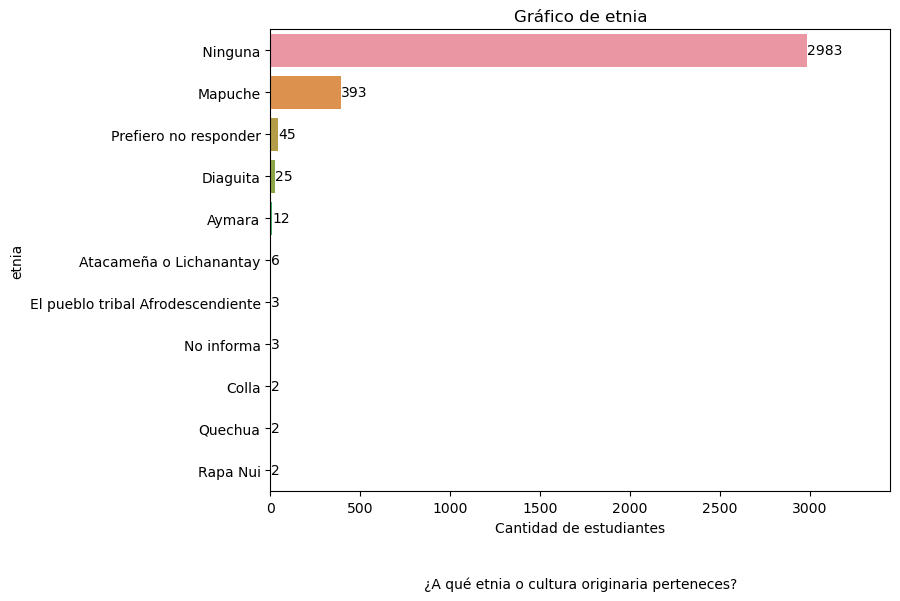

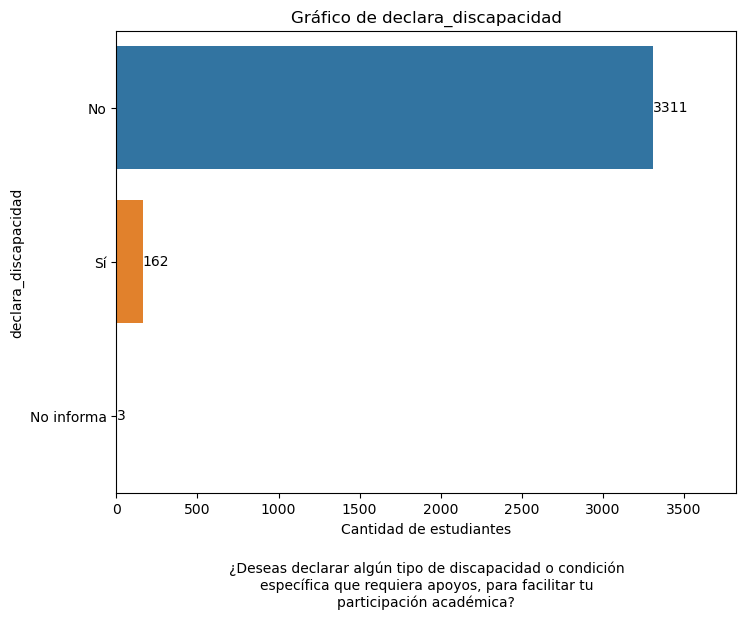

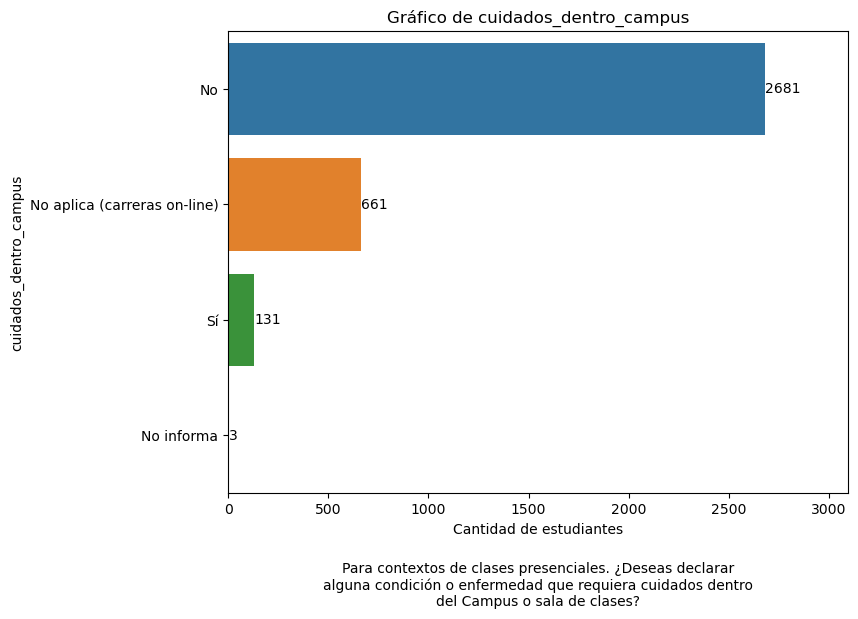

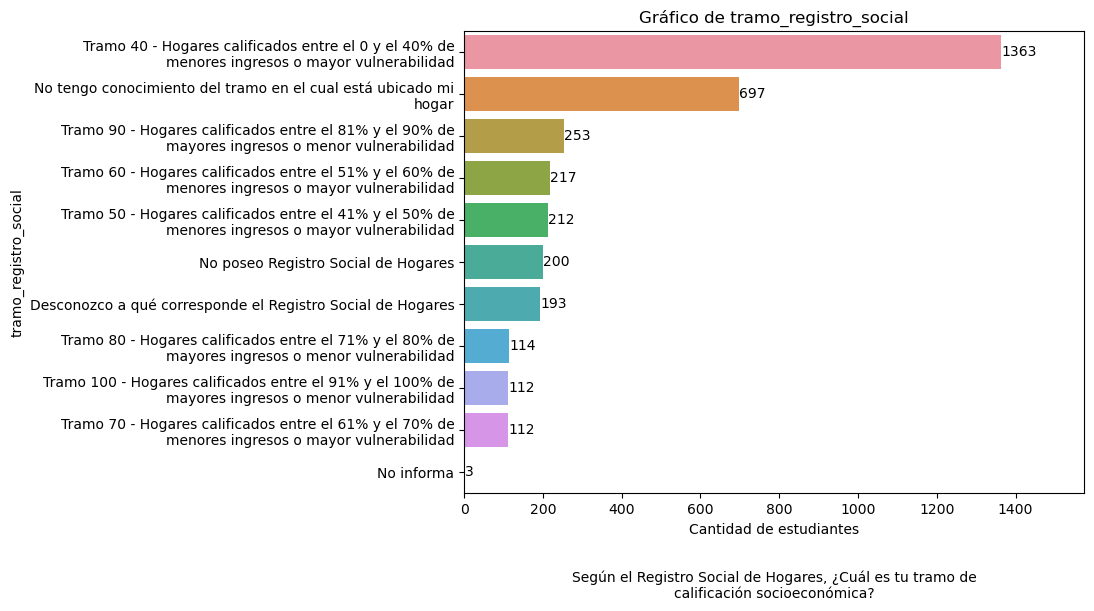

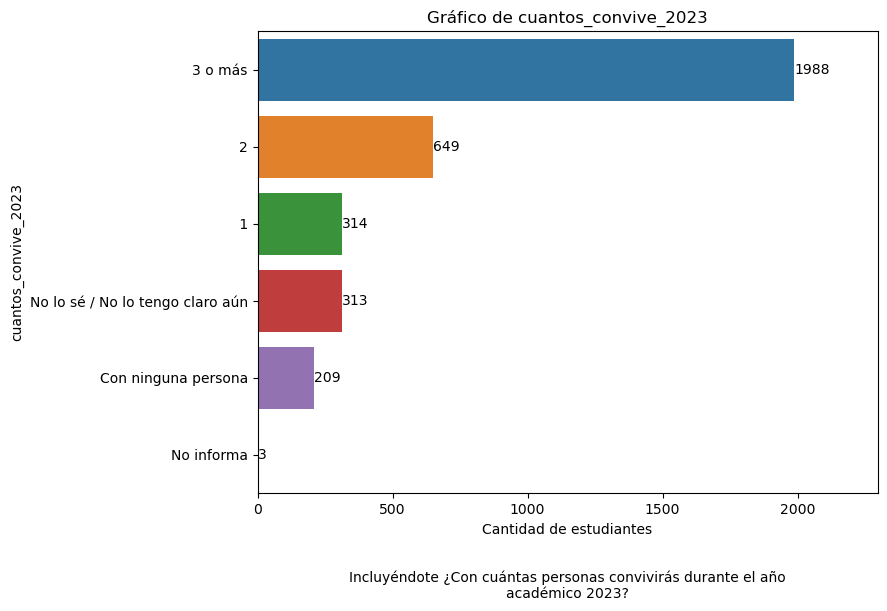

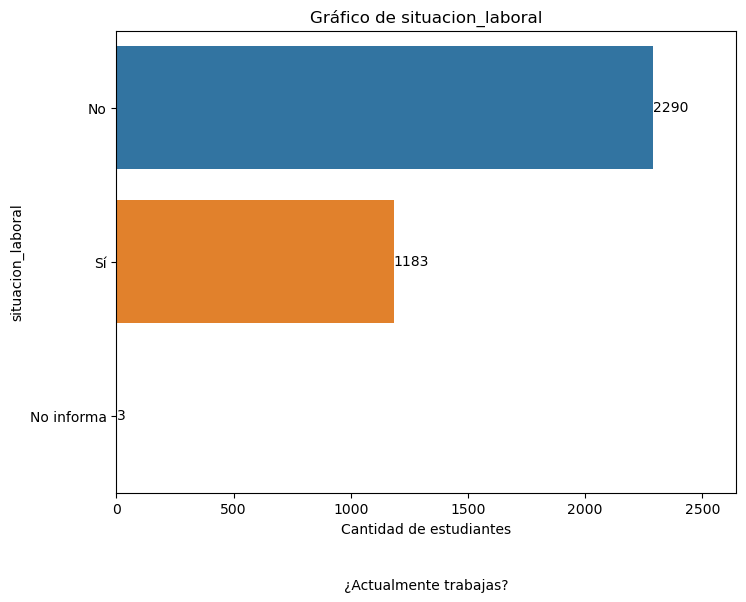

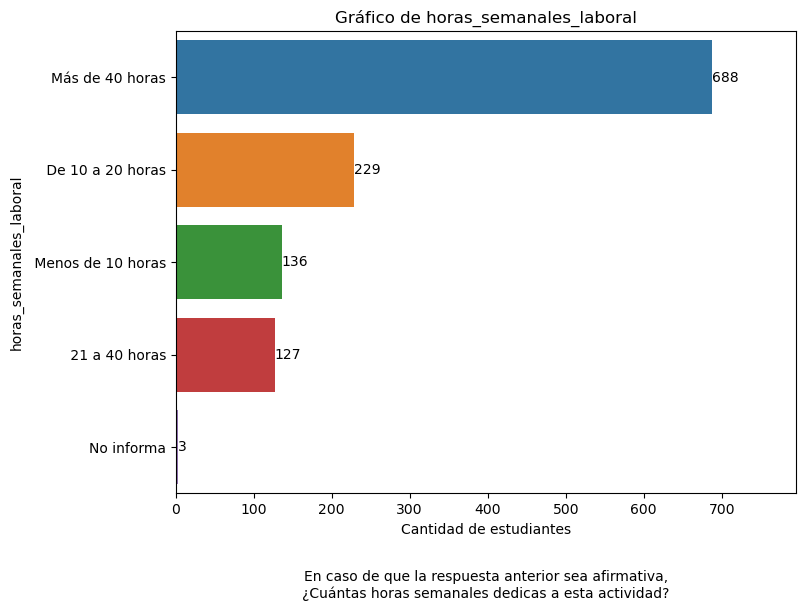

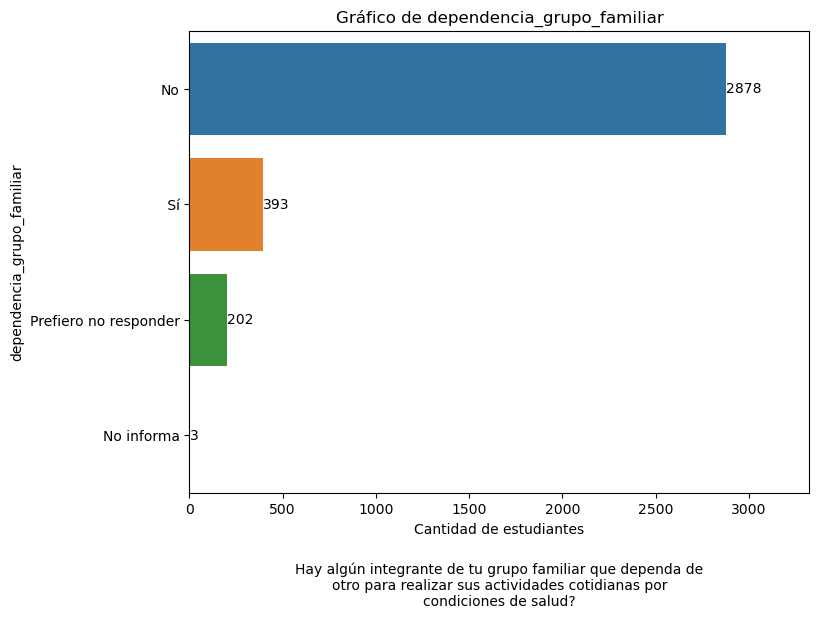

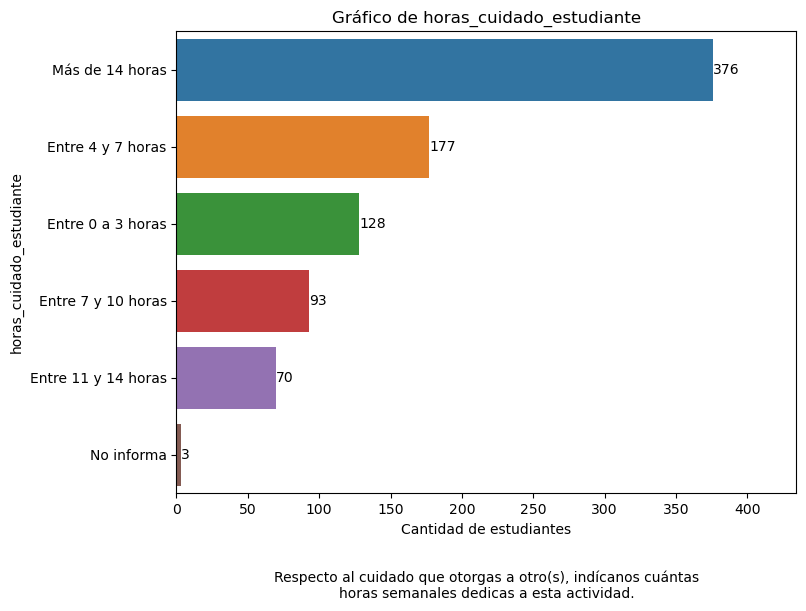

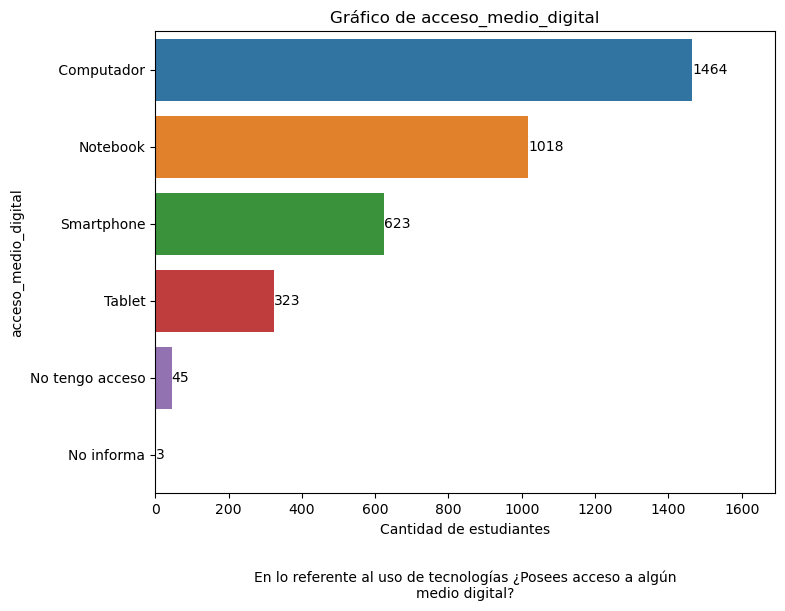

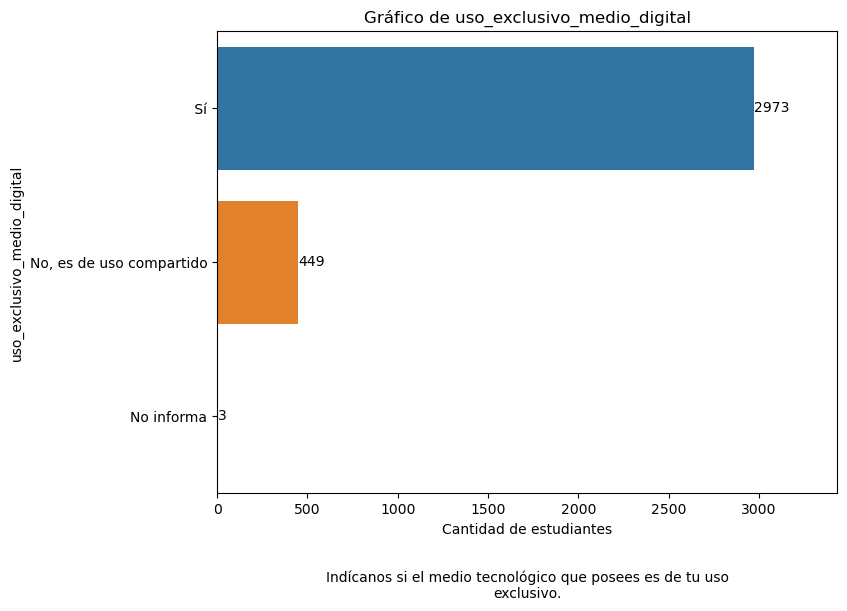

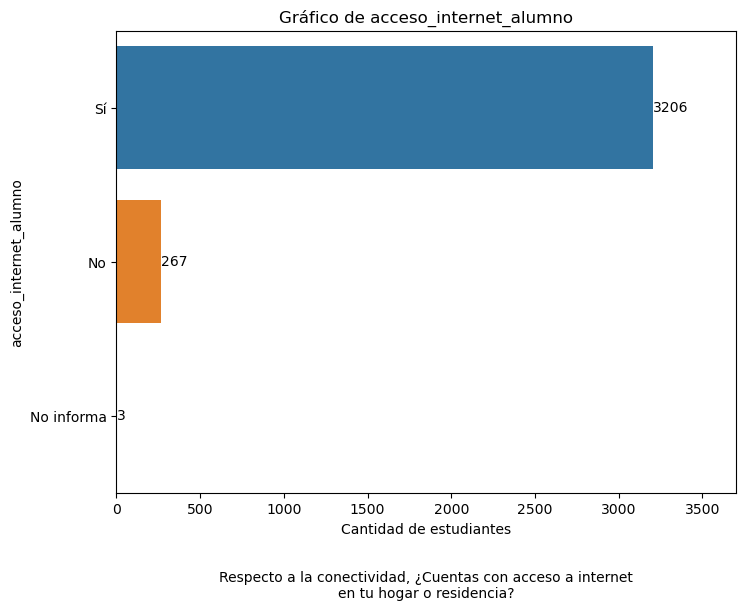

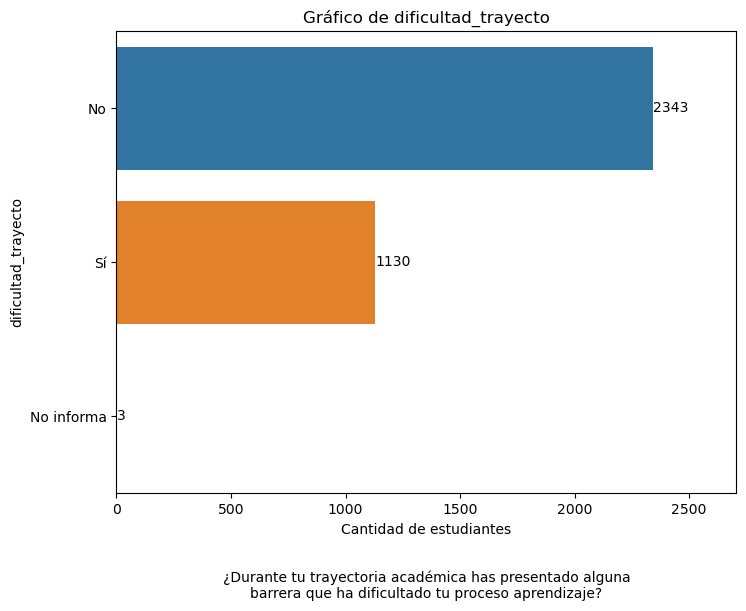

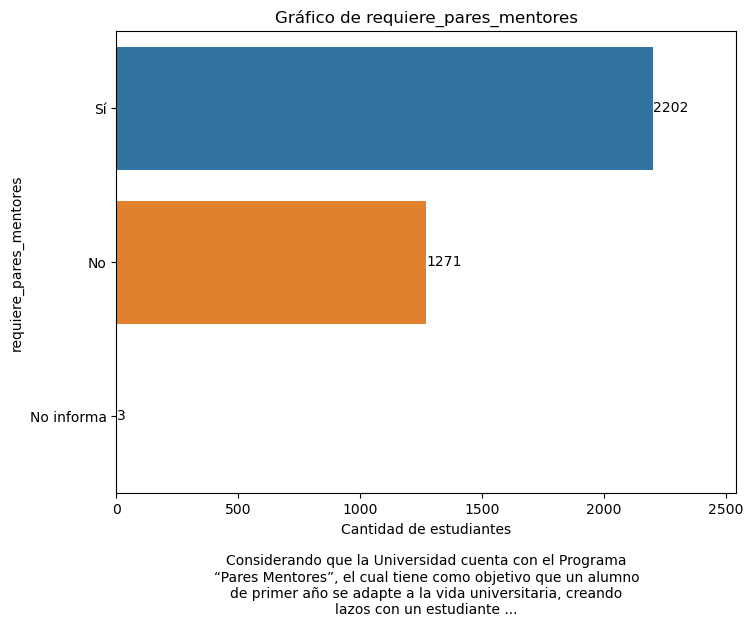

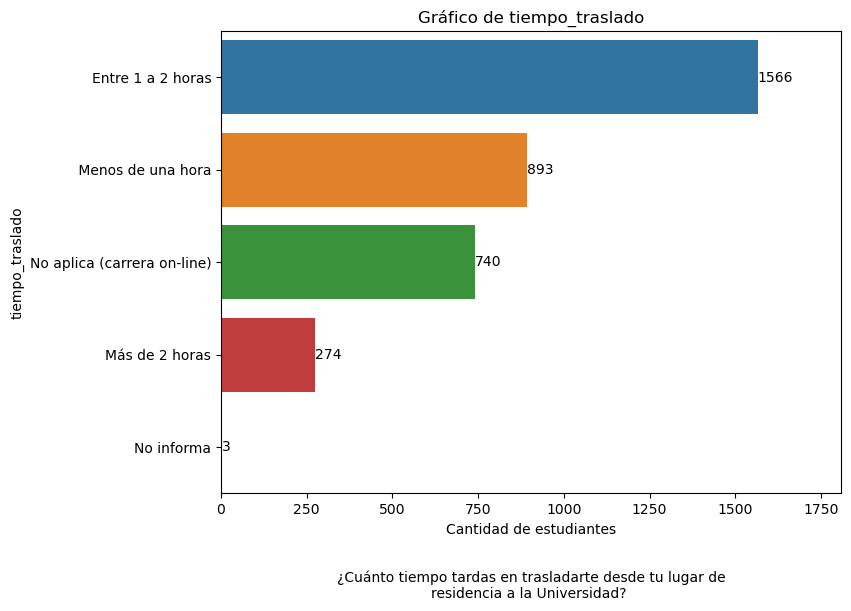

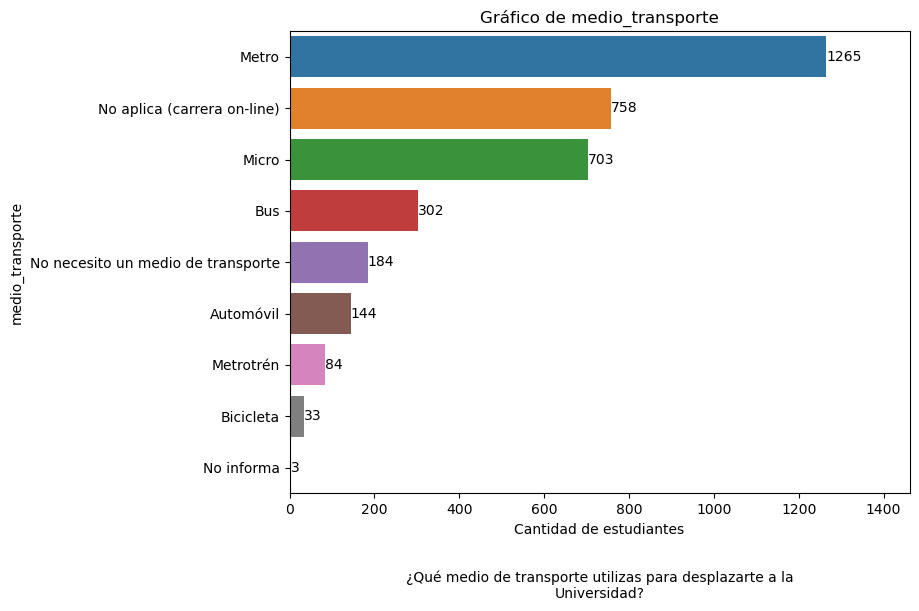

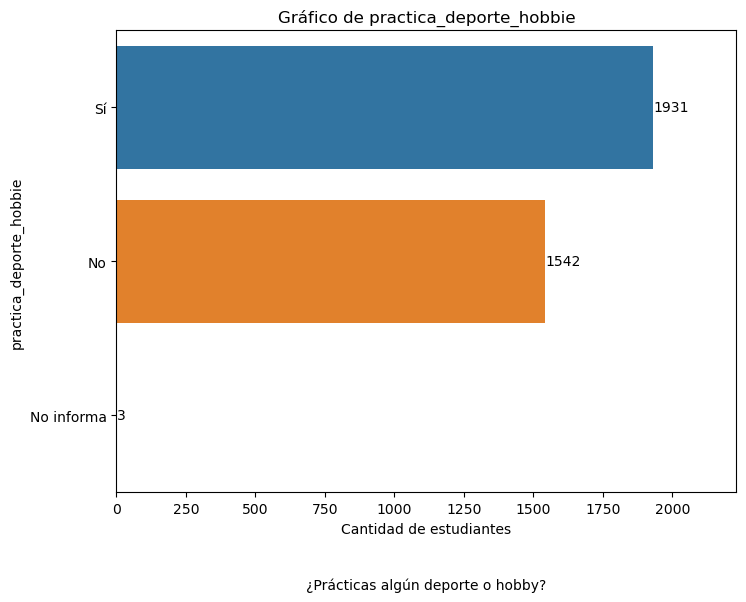

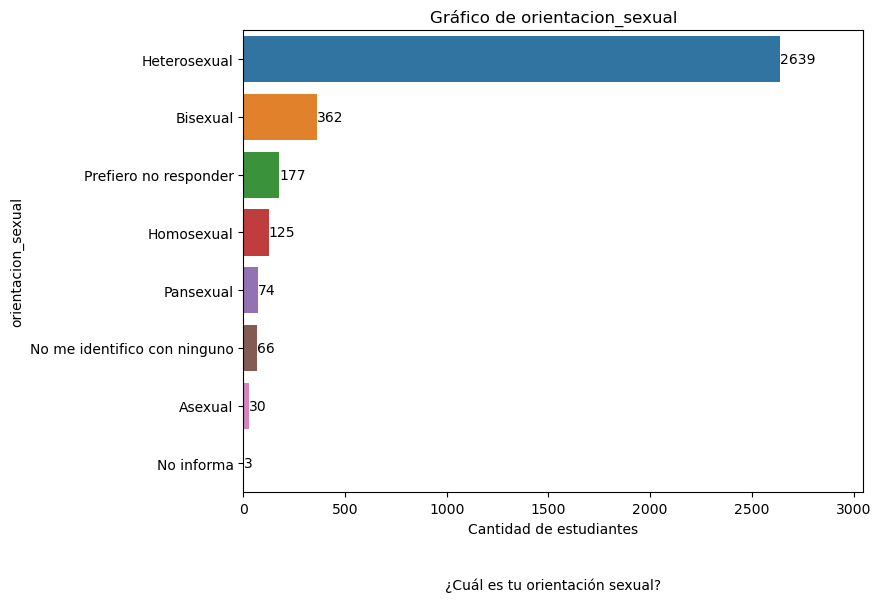

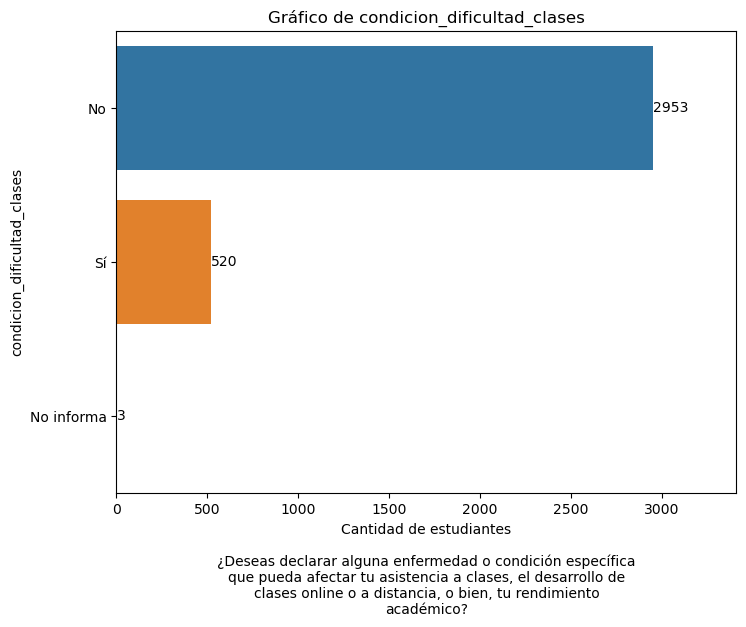

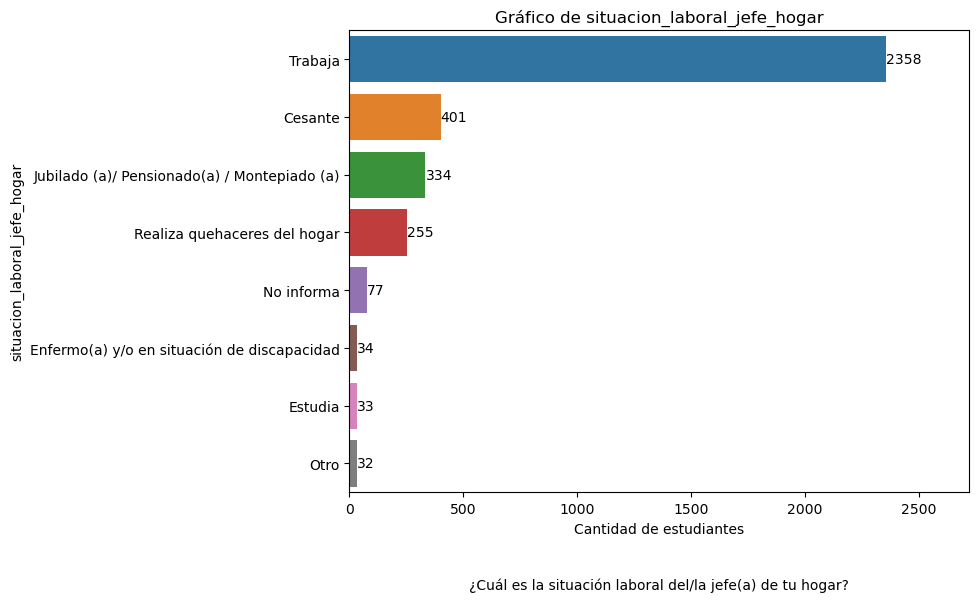

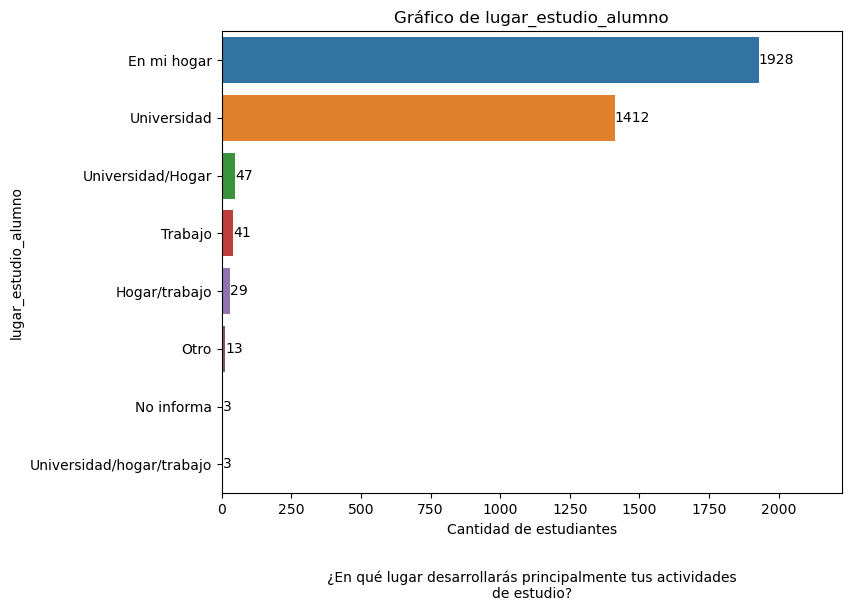

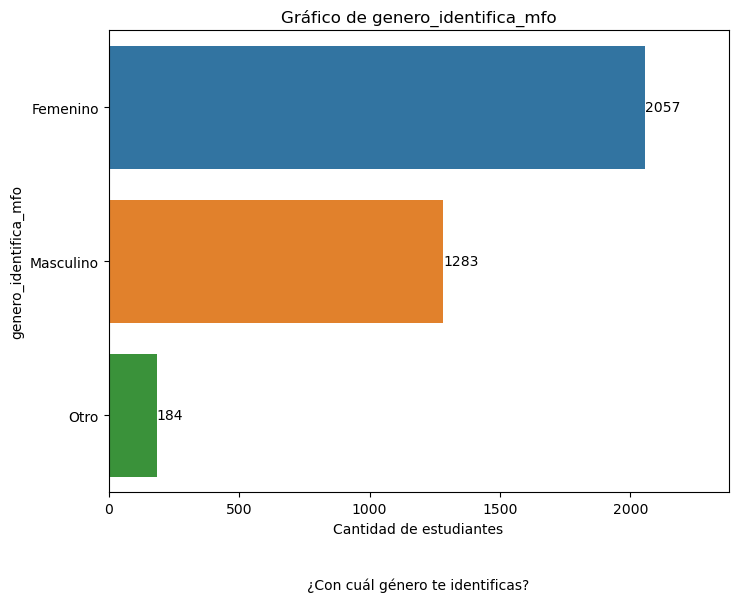

In [16]:
for gr in graficar:
    graficar_mod(nuevo_df, gr)

# Preguntas con respuestas múltiples

Se crea un diccionario con los nombres de las variables que se usarán para construir los gráficos, con estas variables viene el valor de la cantidad de respuestas originales.

La variable pasa por un ciclo for que primero convierte los valores a dummies para poder contar las coincidencias, se tienen en cuenta las respuestas originales y en el conteo las que sobrepasan de este valor se consideran como otros.

In [24]:
## Diccionario con las variables a graficar y con la cantidad de respuestas originales
multi_dic = {
    'acreditacion_discapacidad': 5,
    'estudios_familiar': 6,
    'mayores_habilidades': 8,
    'area_aprendizaje_quiere_potenciar': 8,
    'apoyo_pedadogico_requiere': 5,
    'actividades_de_interes': 8,
    'preferencias_estudio': 6,
    'preferencia_act_extracurricular': 4,
}

In [23]:
## Esta función cuenta realiza la suma de los valores dummies, los junta en un nuevo dataset y los ordena
def rep_otros(dataset, num): 
    sum_values = dataset.sum().sort_values(ascending=False)
    sorted_dataset = dataset[sum_values.index]
    originales = sorted_dataset.iloc[:, :num]
    columnas_a_contar = sorted_dataset.iloc[:, num:]
    suma_total_coincidencias = columnas_a_contar.sum().sum()
    nueva_fila = pd.DataFrame({'Otros': [suma_total_coincidencias]})
    multi_un = pd.concat([originales, nueva_fila], ignore_index=True).fillna(0)
    sum_values = multi_un.sum().sort_values(ascending=False)
    sorted_dataset = multi_un[sum_values.index]
    multi_sorted = sorted_dataset.copy()
    return multi_sorted

In [42]:
def gra_multi_resp(multi, op, column):
    multi_sor = rep_otros(multi, op)
    #column = columna
    fig, ax = plt.subplots(figsize=(8,6))
    sns.barplot(x=multi_sor.sum().values, y=multi_sor.columns, ax=ax, order=multi_sor.sum().sort_values(ascending=False).index)
    plt.yticks(fontsize=8)
    wrap_labels(ax, 40)
    titulo = def_dic[column] if column in def_dic else None
    #plt.title('Gráfico de ' + column)
    plt.title('Gráfico de ' + str(column))
    plt.xlabel('Cantidad de estudiantes')
    plt.ylabel(column)
    ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
    #descripcion_recortada = '\n'.join(textwrap.wrap(titulo, width=60))
    descripcion_recortada = '\n'.join(textwrap.wrap(titulo, width=60)) if titulo is not None else ''
    plt.text(0.5, -0.20, descripcion_recortada, ha='center', va='center', transform=ax.transAxes)
    # Agregar los valores en las barras
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        value = int(width)
        ax.annotate(f'{value}', (x + width, y + height/2), ha='left', va='center')
    plt.show()


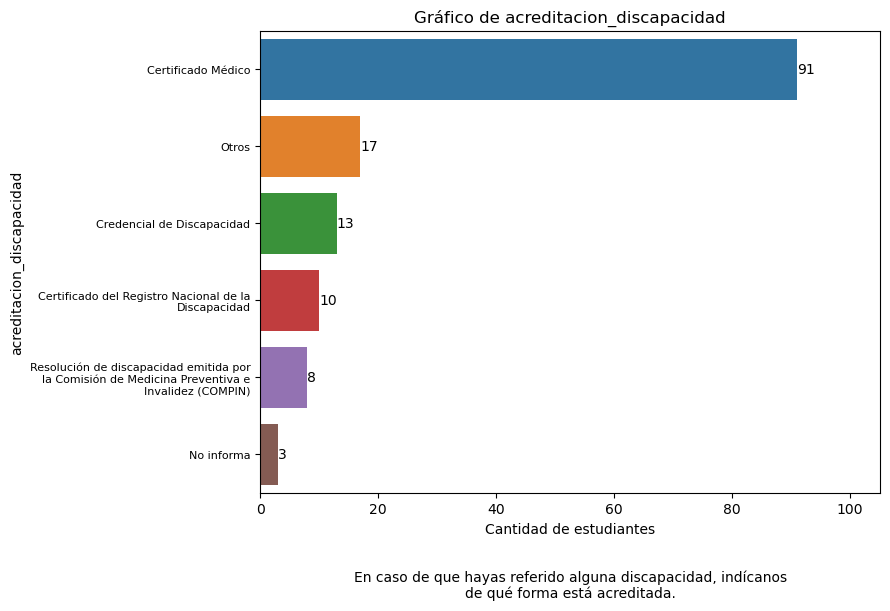

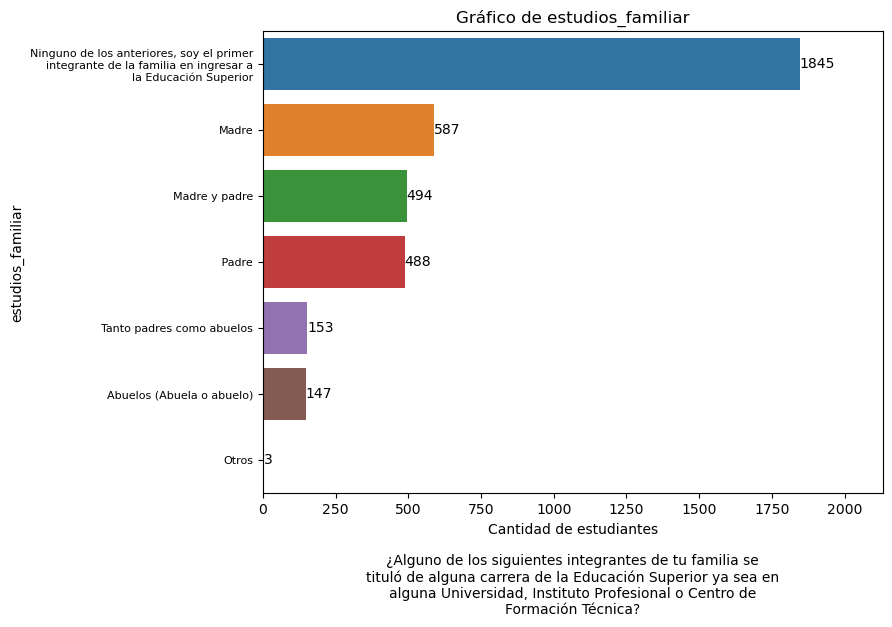

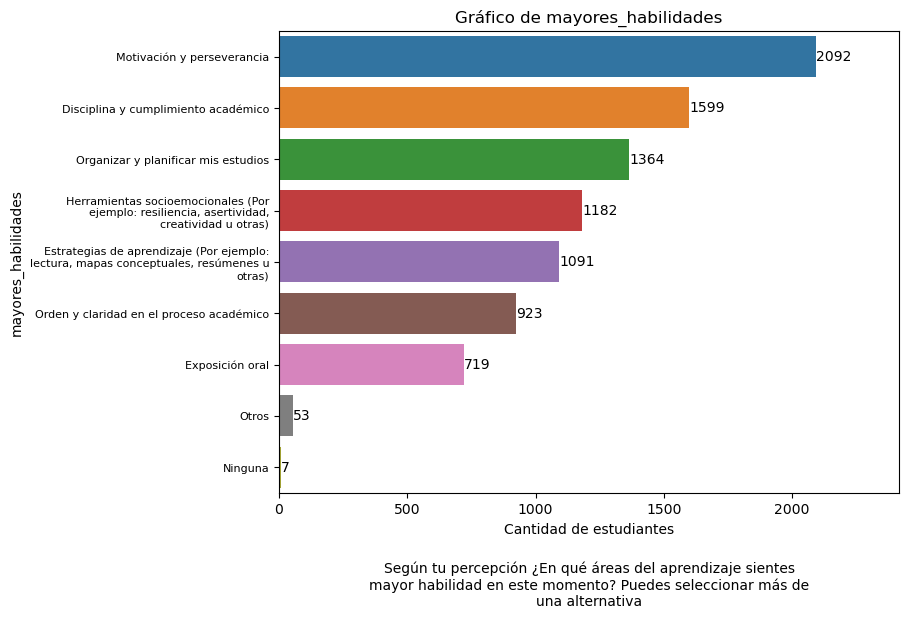

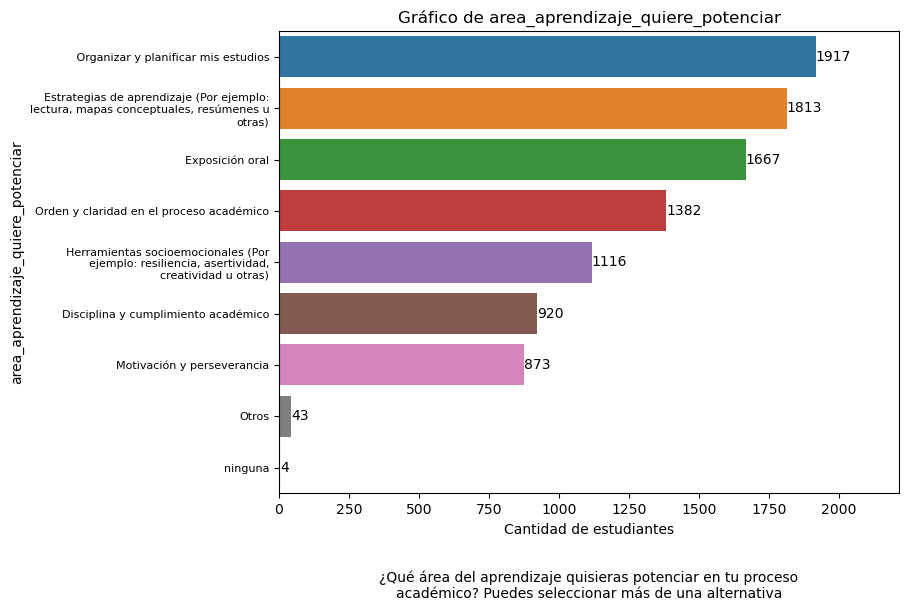

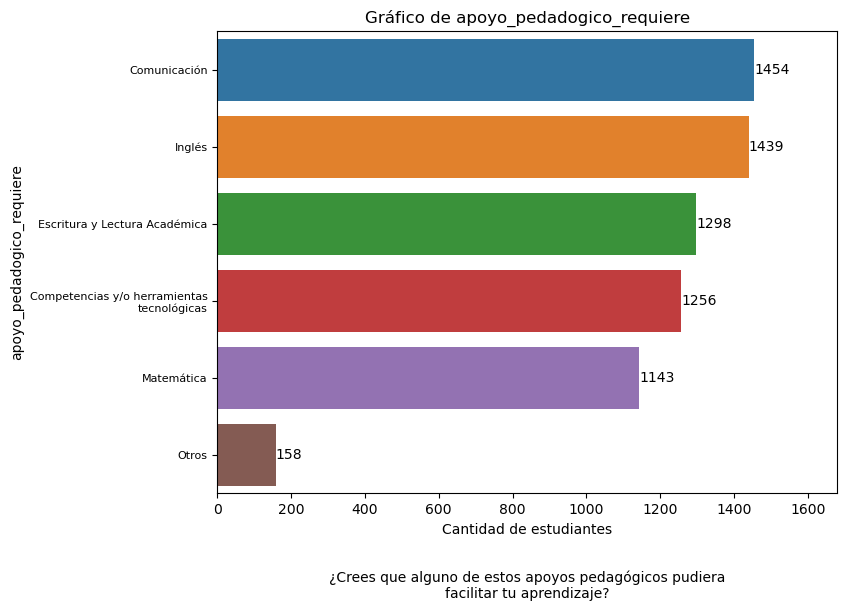

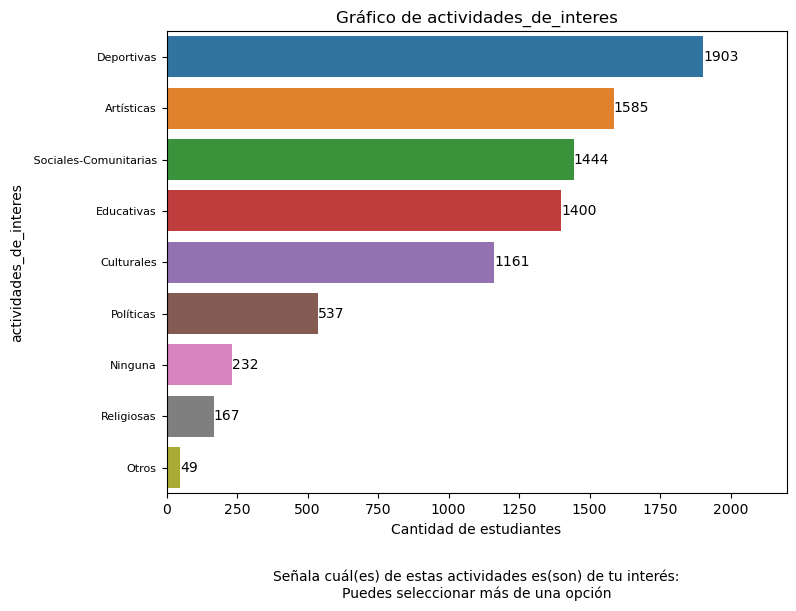

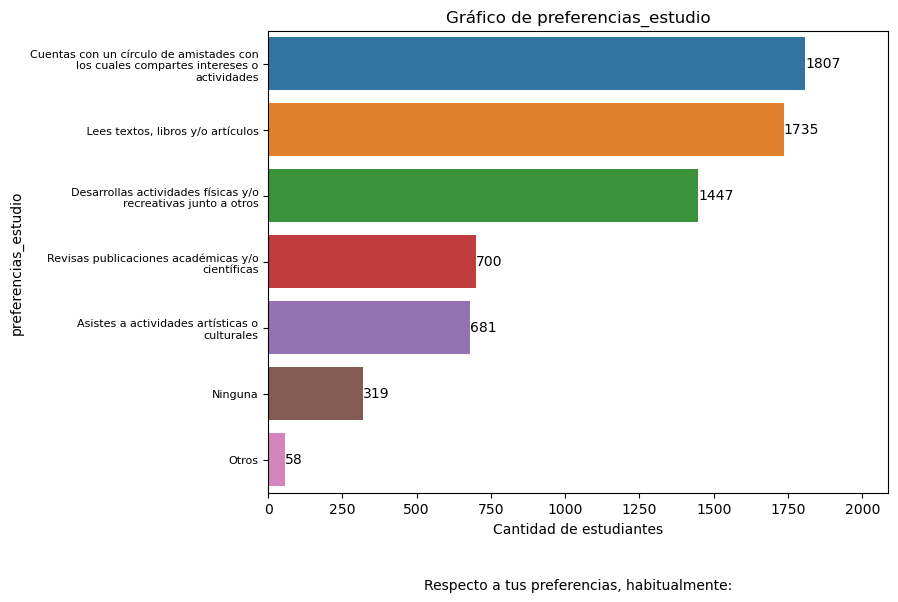

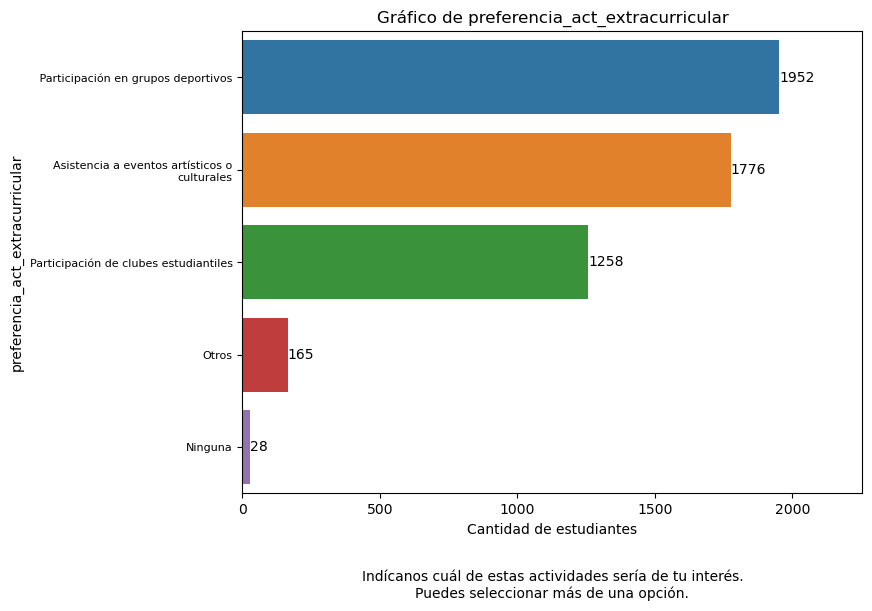

In [44]:
## Creación de los gráficos a partir del diccionario multi_dic
for columna, op in multi_dic.items():
    mul = df[columna].str.get_dummies(sep=';')
    gra_multi_resp(mul, op, columna)

In [57]:
df['plan_estudio_descripcion'].value_counts()

MEDICINA VETERINARIA                       204
PSICOLOGÍA                                 174
TECNOLOGÍA MÉDICA                          145
ENFERMERÍA                                 128
ARQUITECTURA                               127
                                          ... 
CONSTRUCCIÓN  CIVIL                          1
INTERPRETE MUSICAL SUPERIOR EN VIOLÍN        1
INTERPRETE MUSICAL SUPERIOR VIOLONCELLO      1
SOCIOLOGÍA (blended)                         1
TÉC. UNIV. EN TECNOLOGÍAS DE LA INFORM.      1
Name: plan_estudio_descripcion, Length: 94, dtype: int64

In [60]:
test = df['plan_estudio_descripcion'].value_counts()

In [62]:
for i in test.index:
    print(i)

MEDICINA VETERINARIA
PSICOLOGÍA
TECNOLOGÍA MÉDICA
ENFERMERÍA
ARQUITECTURA
DERECHO
OBSTETRICIA Y PUERICULTURA
KINESIOLOGÍA
ADMINISTRACIÓN PÚBLICA  CONT. (ON-LINE)
MEDICINA
ING. CIVIL INDUSTRIAL  (CONTI.-ONL)
ANIMACIÓN DIGITAL
INGENIERÍA COMERCIAL (DIURNO)
TERAPIA OCUPACIONAL
ODONTOLOGÍA
BACHILLERATO EN CIENCIAS DE LA SALUD
INGENIERÍA  EN LOGÍSTICA ( CONT. ONLINE)
ING. PREVENCIÓN EN RIESGOS CON.(ON-LINE)
NUTRICIÓN Y DIETÉTICA
INGENIERÍA  CIVIL  EN  COMP. E  INF.
FONOAUDIOLOGÍA
INGENIERÍA CIVIL INDUSTRIAL
INGENIERÍA INDUSTRIAL (ONL)
DISEÑO
INGENIERÍA EN ADMINISTRACIÓN (ON-LINE)
PSICOLOGÍA (B)
GEOLOGÍA
AGRONOMÍA
INGENIERÍA EN INFORMÁTICA (ONL)
ING. EN ADMINISTRACIÓN (CONTIN, ONLINE)
CINE
DERECHO (V)
INGENIERÍA EN ADMINISTRACIÓN
INGENIERÍA EN CIBERSEGURIDAD (CONT.-ONL)
INGENIERÍA EN CONSTRUCCIÓN 
PEDAGOGÍA EN EDUC. FÍSICA, DEP. Y RECR.
PEDAG. EN EDUCACIÓN DIFERENCIAL C/DISC.
INGENIERÍA CIVIL ELECTRÓNICA
INGENIERÍA COMERCIAL (ONLINE)
ANIMACIÓN DIGITAL (T)
ING. EN MEDIO AMBIENTE Y SUSTENTABIL

In [68]:
#test_2 = df['plan_estudio_descripcion'].uniques
for i in df['plan_estudio_descripcion'].unique():
    print(i)

INTERPRETE MUSICAL SUP.  FLAUTA TRAVERSA
INTERPRETE MUSICAL SUPERIOR EN PIANO
INTERPRETE MUSICAL SUPERIOR VIOLONCELLO
INTERPRETE MUSICAL SUPERIOR EN VIOLÍN
PSICOLOGÍA (V)
CONSTRUCCIÓN  CIVIL
INTERP. MUSICAL SUPERIOR EN CORNO
ARQUITECTURA
PEDAGOGÍA EN INGLÉS PARA ED BÁSIC Y MED.
PEDAGOGÍA EN EDUCACIÓN DIFERENCIAL C/M
DERECHO (V)
INGENIERÍA COMERCIAL (V)
INGENIERÍA EN ADMINISTRACIÓN (ON-LINE)
ADMINISTRACIÓN PÚBLICA  CONT. (ON-LINE)
INGENIERÍA CIVIL INDUSTRIAL
ADMINISTRACIÓN PÚBLICA (CONTINUIDAD)
INGENIERÍA FORESTAL
MEDICINA VETERINARIA
ENFERMERÍA
MEDICINA
NUTRICIÓN Y DIETÉTICA
SOCIOLOGÍA (V)
INGENIERÍA INDUSTRIAL (V)
GEOLOGÍA
ING. PREVENCIÓN EN RIESGOS CON.(ON-LINE)
ING. EN MEDIO AMBIENTE Y SUSTENTABILIDAD
FONOAUDIOLOGÍA
OBSTETRICIA Y PUERICULTURA
TERAPIA OCUPACIONAL
ODONTOLOGÍA
KINESIOLOGÍA
AGRONOMÍA
ANIMACIÓN DIGITAL
BIOTECNOLOGÍA
CINE
DERECHO
DERECHO (ORIENTE)
DISEÑO
nan
No informa
INGENIERÍA CIVIL ELECTRÓNICA
INGENIERÍA  CIVIL  EN  COMP. E  INF.
INGENIERÍA COMERCIAL (DIURNO)
INGENIER

In [69]:
df[df['plan_estudio_descripcion'] == i]

plan_estudio plan_estudio_codigo plan_estudio_descripcion     jornada  \
3517     806711.0        eTULO120-023  TÉC. UNIV. EN LOGÍSTICA  E-Learning   
3518     806711.0        eTULO120-023  TÉC. UNIV. EN LOGÍSTICA  E-Learning   
3519     806711.0        eTULO120-023  TÉC. UNIV. EN LOGÍSTICA  E-Learning   
3520     806711.0        eTULO120-023  TÉC. UNIV. EN LOGÍSTICA  E-Learning   
3521     806711.0        eTULO120-023  TÉC. UNIV. EN LOGÍSTICA  E-Learning   
3522     806711.0        eTULO120-023  TÉC. UNIV. EN LOGÍSTICA  E-Learning   
3523     806711.0        eTULO120-023  TÉC. UNIV. EN LOGÍSTICA  E-Learning   

                   sede          campus declaracion_uso_datos  \
3517  División Santiago  Campus Virtual                Acepto   
3518  División Santiago  Campus Virtual                Acepto   
3519  División Santiago  Campus Virtual                Acepto   
3520  División Santiago  Campus Virtual                Acepto   
3521  División Santiago  Campus Virtual                Acepto   
3522  División Santiago  Campus Virtual                Acepto   
3523  División Santiago  Campus Virtual                Acepto   

                         t_desde_egreso razon_ingreso_tardio_ed_mayor  \
3517  El egreso fue hace dos años o más       POR NACIMIENTO DE HIJOS   
3518  El egreso fue hace dos años o más           Recursos económicos   
3519  El egreso fue hace dos años o más           Recursos económicos   
3520  El egreso fue hace dos años o más           Recursos económicos   
3521  El egreso fue hace dos años o más         Definición vocacional   
3522  El egreso fue hace dos años o más                        tiempo   
3523  El egreso fue hace dos años o más         Definición vocacional   

     estudia_antes_edsup  ... requiere_pares_mentores  \
3517                  No  ...                      Sí   
3518                  No  ...                      No   
3519                  No  ...                      Sí   
3520                  Sí  ...                      Sí   
3521                  No  ...                      No   
3522                  Sí  ...                      No   
3523                  Sí  ...                      Sí   

                  tiempo_traslado             medio_transporte  \
3517  No aplica (carrera on-line)  No aplica (carrera on-line)   
3518  No aplica (carrera on-line)  No aplica (carrera on-line)   
3519  No aplica (carrera on-line)  No aplica (carrera on-line)   
3520  No aplica (carrera on-line)  No aplica (carrera on-line)   
3521  No aplica (carrera on-line)  No aplica (carrera on-line)   
3522  No aplica (carrera on-line)  No aplica (carrera on-line)   
3523  No aplica (carrera on-line)  No aplica (carrera on-line)   

                   actividades_de_interes  \
3517  Educativas; Sociales-Comunitarias ;   
3518                             Ninguna;   
3519    Deportivas;Artísticas;Culturales;   
3520                          Educativas;   
3521   Sociales-Comunitarias ;Educativas;   
3522                          Culturales;   
3523  Deportivas; Sociales-Comunitarias ;   

                                   preferencias_estudio  \
3517                                           Ninguna;   
3518  Desarrollas actividades físicas y/o recreativa...   
3519   Lees textos, libros y/o artículos ;Cuentas co...   
3520                Lees textos, libros y/o artículos ;   
3521                Lees textos, libros y/o artículos ;   
3522                                           Ninguna;   
3523  Desarrollas actividades físicas y/o recreativa...   

     practica_deporte_hobbie       indica_deporte_hobbie  \
3517                      No                         NaN   
3518                      Sí                     Fútbol    
3519                      Sí  Fútbol, ejercicios varios    
3520                      No                         NaN   
3521                      No                         NaN   
3522                      No                         NaN   
3523                      No      